In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score,f1_score,confusion_matrix,classification_report


In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/cardel/repositorios/main/titanic/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
datos_trabajo = data[["Survived","Pclass","Sex","Age","SibSp","Parch","Cabin"]]

In [9]:
datos_trabajo["Pclass"].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [10]:
datos_trabajo["Sex"].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [11]:
datos_trabajo["Age"].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

<Figure size 1200x800 with 0 Axes>

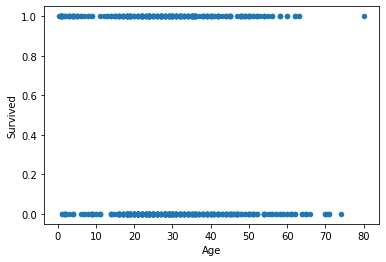

In [17]:
plt.figure(dpi=200)
datos_trabajo.plot(kind="scatter", x="Age", y="Survived")

In [22]:
datos_trabajo["Age_fixed"] = datos_trabajo["Age"].fillna(datos_trabajo["Age"].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
datos_trabajo["Age_fixed"] .value_counts(dropna=False)

29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
55.500000      1
53.000000      1
20.500000      1
23.500000      1
0.420000       1
Name: Age_fixed, Length: 89, dtype: int64

In [24]:
#SibSp","Parch","Cabin"
datos_trabajo["SibSp"].value_counts(dropna=False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
datos_trabajo["Parch"].value_counts(dropna=False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [26]:
datos_trabajo["Cabin"].value_counts(dropna=False)

NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
E63              1
D48              1
B73              1
E10              1
A26              1
Name: Cabin, Length: 148, dtype: int64

In [27]:
datos_finales = datos_trabajo[["Survived","Pclass","Sex","Age_fixed","SibSp","Parch",]]

In [29]:
X = datos_finales[["Pclass","Sex","Age_fixed","SibSp","Parch"]]
y = datos_finales["Survived"]

In [30]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [33]:
X["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [36]:
X[["C1","C2","C3"]] = pd.get_dummies(X["Pclass"])

In [40]:
X["Sex_C"] = pd.get_dummies(X["Sex"])["female"]

In [51]:
X.head()

,Pclass,Sex,Age_fixed,SibSp,Parch,C1,C2,C3,Sex_C
0,3,male,22.0,1,0,0,0,1,0
1,1,female,38.0,1,0,1,0,0,1
2,3,female,26.0,0,0,0,0,1,1
3,1,female,35.0,1,0,1,0,0,1
4,3,male,35.0,0,0,0,0,1,0


In [58]:
scaler = StandardScaler()
X[["Age"]] = scaler.fit_transform(X[["Age_fixed"]].values)

In [59]:
X.head()

,Pclass,Sex,Age_fixed,SibSp,Parch,C1,C2,C3,Sex_C,Age
0,3,male,22.0,1,0,0,0,1,0,-0.592481
1,1,female,38.0,1,0,1,0,0,1,0.638789
2,3,female,26.0,0,0,0,0,1,1,-0.284663
3,1,female,35.0,1,0,1,0,0,1,0.407926
4,3,male,35.0,0,0,0,0,1,0,0.407926


In [60]:
X[["SibSp"]] = scaler.fit_transform(X[["SibSp"]].values)
X[["Parch"]] = scaler.fit_transform(X[["Parch"]].values)

In [61]:
X.head()

,Pclass,Sex,Age_fixed,SibSp,Parch,C1,C2,C3,Sex_C,Age
0,3,male,22.0,0.432793,-0.473674,0,0,1,0,-0.592481
1,1,female,38.0,0.432793,-0.473674,1,0,0,1,0.638789
2,3,female,26.0,-0.474545,-0.473674,0,0,1,1,-0.284663
3,1,female,35.0,0.432793,-0.473674,1,0,0,1,0.407926
4,3,male,35.0,-0.474545,-0.473674,0,0,1,0,0.407926


In [62]:
X = X[["C1","C2","C3","SibSp","Parch","Sex_C","Age"]]

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
modelo = MLPClassifier(solver="sgd",hidden_layer_sizes=(7, 14,3),learning_rate_init=0.7)

In [95]:
modelo.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 14, 3), learning_rate='constant',
              learning_rate_init=0.7, max_fun=15000, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [96]:
print(modelo.score(X_test,y_test))

0.8212290502793296


In [97]:
predecidos = modelo.predict(X_test)
print(classification_report(y_test,predecidos))

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [98]:
confusion_matrix(y_test,predecidos)

array([[94, 11],
       [21, 53]])